We have used Batch gradient descent as our classifier as the size of data is small.

The value of thetha obtained by our classifier is :  [-0.17667839 -0.06390967  0.71746485  0.81360135  0.57317156  0.36595969
 -0.41957841  0.41009939 -0.45633365  0.47086729  0.46830594  0.39326343
  0.94790658  0.69388027]

The accuracy of classifier on test set is :  84.61538461538461 % 
The accuracy of classifier on training set is :  87.26415094339622 %


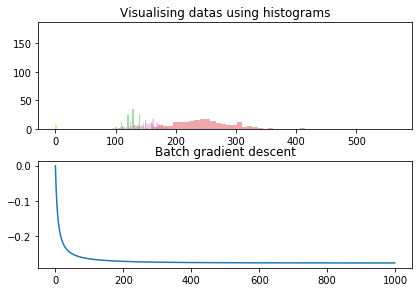

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 09:48:23 2020

@author: manavagrawal
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""Visualise Data"""
def visualiseData(dataset,plotterSpace):
    for i in range(dataset.shape[1] - 1):
        plotterSpace.hist(dataset[:,i+1],bins = 50, alpha = 0.4)
        plotterSpace.set_title("Visualising datas using histograms")
        
"""Data Preprocessing"""
def dataPreProcessing(x):
    x = np.column_stack((np.ones(x.shape[0]),x))
    x = featureScaling(x)
    return x

"""Function to Perform feature Scaling"""
def featureScaling(data):
    for i in range(1,data.shape[1]):
        data[:,i] = (data[:,i] - np.mean(data[:,i])) / np.std(data[:,i])
    return data

"""Helper function for calculating gradient descent"""
def gradientDescent(x_train,y_train,thetha,learningRate):
    m = x_train.shape[0]
    pred_y = 1 / (1 + np.exp(- (x_train @ thetha.T)))
    thetha = thetha - (learningRate/m) * ((x_train.T @ (pred_y - y_train)) - (learningRate * thetha))
    return thetha

"""function for determining thetha"""
def calc_thetha(x_train,y_train,epochs,learningRate,thetha):
    thetha_history = np.empty((epochs,len(thetha)))
    for i in range(epochs):
        thetha_history[i] = gradientDescent(x_train,y_train,thetha,learningRate)
        thetha = thetha_history[i]
    return thetha_history


"""Calculates loss and reports"""
def costCalculator(x_train,y_train,thetha_history):
    loss_history = list()
    for thethas in thetha_history:
        indivLoss = 0
        pred_y = 1 / (1 + np.exp(- (x_train @ thethas.T)))
        indivLoss = -(np.sum(y_train * np.log(pred_y) + (1 - y_train) * (1 - pred_y)))
        loss_history.append(indivLoss/x_train.shape[0])
    return loss_history

"""function for batch gradient descent"""
def batchGradDesc(x_train,y_train,learningRate,epochs,plotterSpace):
    nosOfFeatures = x_train.shape[1]
    epochs = 1000
    learningRate = 0.15
    thetha = np.zeros(nosOfFeatures)
    thetha_history = calc_thetha(x_train,y_train,epochs,learningRate,thetha)
    loss_history = costCalculator(x_train, y_train, thetha_history)
    plotterSpace.plot(range(epochs),loss_history)
    plotterSpace.set_title("Batch gradient descent")
    minIndex = np.argmin(loss_history)
    thetha = thetha_history[minIndex]
    return thetha
    
"""function for predicting based on thetha"""
def predictGradientDescent(x_test,thetha):
    predictedY = 1 / (1+(np.exp( - (x_test @ thetha.T))))
    logisticOutput = [(round(num)) for num in predictedY]
    return logisticOutput

"""Function for calculating Accuracy of our prediction"""
def accuracy(predY,y_test):
    rightPred = 0
    for i in range(len(predY)):
        if predY[i] == y_test[i]:
            rightPred += 1
    return rightPred

"""Obtaining Dataset"""
dataset = pd.read_csv("cleveland.csv").to_numpy()
w,h = dataset.shape
trainSize = int(np.floor(0.7 * w))
testSize = w - trainSize

"""Splitting dataset into test and train sets"""
x_train = dataset[:trainSize,:13]
y_train = dataset[:trainSize,13]
x_test = dataset[trainSize:,:13]
y_test = dataset[trainSize:,13]

"""Visualising Dataset"""
fig,axs = plt.subplots(2,1)
fig.tight_layout()
visualiseData(x_train,axs[0])

"""Adding basis and Perform feature scaling on dataset"""
x_train = dataPreProcessing(x_train)
x_test = dataPreProcessing(x_test)

"""Calling classifier"""
thetha = batchGradDesc(x_train, y_train,0.1,1000,axs[1])
predY = predictGradientDescent(x_test, thetha)
predY2 = predictGradientDescent(x_train, thetha)

"""Calculating Accuracy of Model"""
accuracyOfModel = accuracy(predY, y_test)
accuracyOfModel2 = accuracy(predY2, y_train)
print("We have used Batch gradient descent as our classifier as the size of data is small.")
print("\nThe value of thetha obtained by our classifier is : ",thetha)
print("\nThe accuracy of classifier on test set is : ",accuracyOfModel/testSize * 100,"% \nThe accuracy of classifier on training set is : ",accuracyOfModel2/trainSize*100,"%")

